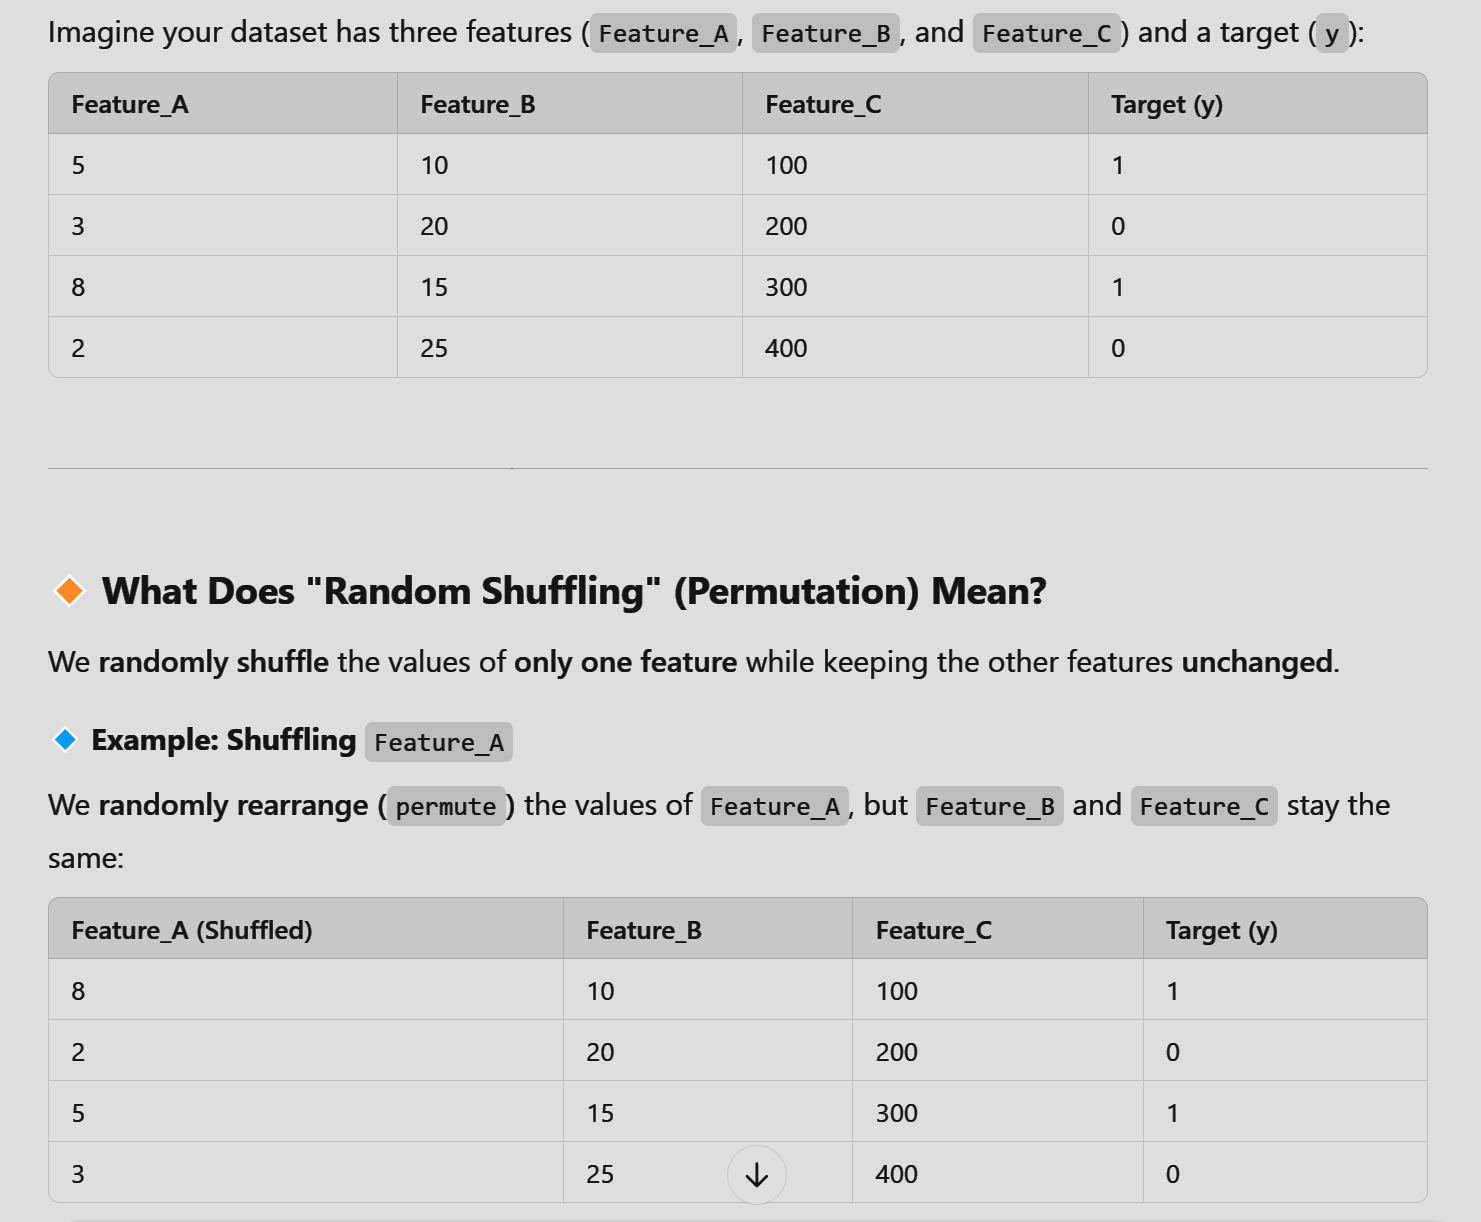

The biggest drawback thing about Feature Importance (Permutation Importance or Tree-Based Importance) is that it doesn’t handle feature interactions or correlations well.

Basically, sometimes fetures dont work alone.

What is SHAP in Machine Learning and Deep Learning?
SHAP (SHapley Additive exPlanations) is a popular model interpretability tool that helps explain why a machine learning model made a specific prediction. It assigns an importance value to each feature for an individual prediction.

Think of SHAP as answering the question:
"Which features contributed the most to this decision, and by how much?

SHAP is based on Shapley values, a concept from cooperative game theory. It treats features like "players" in a game and calculates how much each feature contributes to the final prediction.

For example, in a house price prediction model, SHAP might tell you:

> "Square Footage" increased the price by $50,000

> "Neighborhood" decreased the price by $10,000

> "Age of House" decreased the price by $5,000

In [ ]:
import shap
import xgboost
import pandas as pd
from sklearn.model_selection import train_test_split


In [ ]:
from sklearn.datasets import fetch_california_housing  #data already in sk learn

In [ ]:
housing = fetch_california_housing()  # housing is like a data package

In [ ]:
housing.target.shape

In [ ]:

X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

In [ ]:
X

In [ ]:
X.columns

In [ ]:
y

In [ ]:
X.head()

In [ ]:
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

I would scale a this point, but we just skip for now

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from xgboost import XGBRegressor  # This is our Machine learning regression model

In [ ]:
model=XGBRegressor()  # make an instance of the model

In [ ]:
model.fit(X_train,y_train)  # Lets train our model on the training data

Step 1: Evaluate the Model Before Using SHAP
Before we use SHAP to interpret a model, we must first check if the model is any good. This means we need to evaluate y_pred (predicted values) against y_test (true values).

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score  # importing our evaluation metrics

# Make predictions on test set with our trained model
y_pred = model.predict(X_test)



In [ ]:
y_pred  # now go and see if your mdoel did any good, by comparing this to your test data

In [ ]:
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae:.2f}")
print(f"R² Score: {r2:.2f}")  # The closer this is to 1, the better, @  ).5 , your model is Junk
# Good R2 score,   > 65%  or 0.65

Step 2: If the Model Sucks, Fix It First!
If the model performs poorly:

Check for Data Issues – Maybe data is noisy or unbalanced.
Try Feature Engineering – Add new features or remove useless ones.
Tune Hyperparameters – Adjust the learning rate, number of trees, regularization, etc.
Use a Different Model – Maybe XGBoost isn’t the best; try Random Forest or a deep learning model.

In [ ]:
# remember , we already imported shap
# Create SHAP explainer
explainer = shap.Explainer(model)  # This has to be the trained model (training data)

In [ ]:
# Now extract the shap values,
shap_values = explainer(X_test)  # Note , we are giving it, our X test NOT x train
# pay attention to the time it takes,

In [ ]:
shap_values

In [ ]:
type(shap_values.values)

In [ ]:
# Visualize feature importance , we get the visualisation tool, directly from shap itself
shap.summary_plot(shap_values, X_test)  # summary plot is a tool in shap library

In [ ]:
X.columns

In [ ]:
type(shap_values.values)

In [ ]:
shap.dependence_plot("MedInc", shap_values.values, X_test, interaction_index="HouseAge")  # much more detail as well as clarifying interaction between festures
# Important , give the shap values, as numpy arrays

In [ ]:
#shap.dependence_plot("MedInc", shap_values.values, X_test, interaction_index="HouseAge")
#shap.dependence_plot("HouseAge", shap_values.values, X_test, interaction_index="AveRooms")
#shap.dependence_plot("AveRooms", shap_values.values, X_test, interaction_index="AveBedrms")
#shap.dependence_plot("AveBedrms", shap_values.values, X_test, interaction_index="Population")
#shap.dependence_plot("Population", shap_values.values, X_test, interaction_index="AveOccup")
#shap.dependence_plot("AveOccup", shap_values.values, X_test, interaction_index="Latitude")
#shap.dependence_plot("Latitude", shap_values.values, X_test, interaction_index="Longitude")
shap.dependence_plot("Longitude", shap_values.values, X_test, interaction_index="MedInc")

Can SHAP be used with Any model?
Sort of

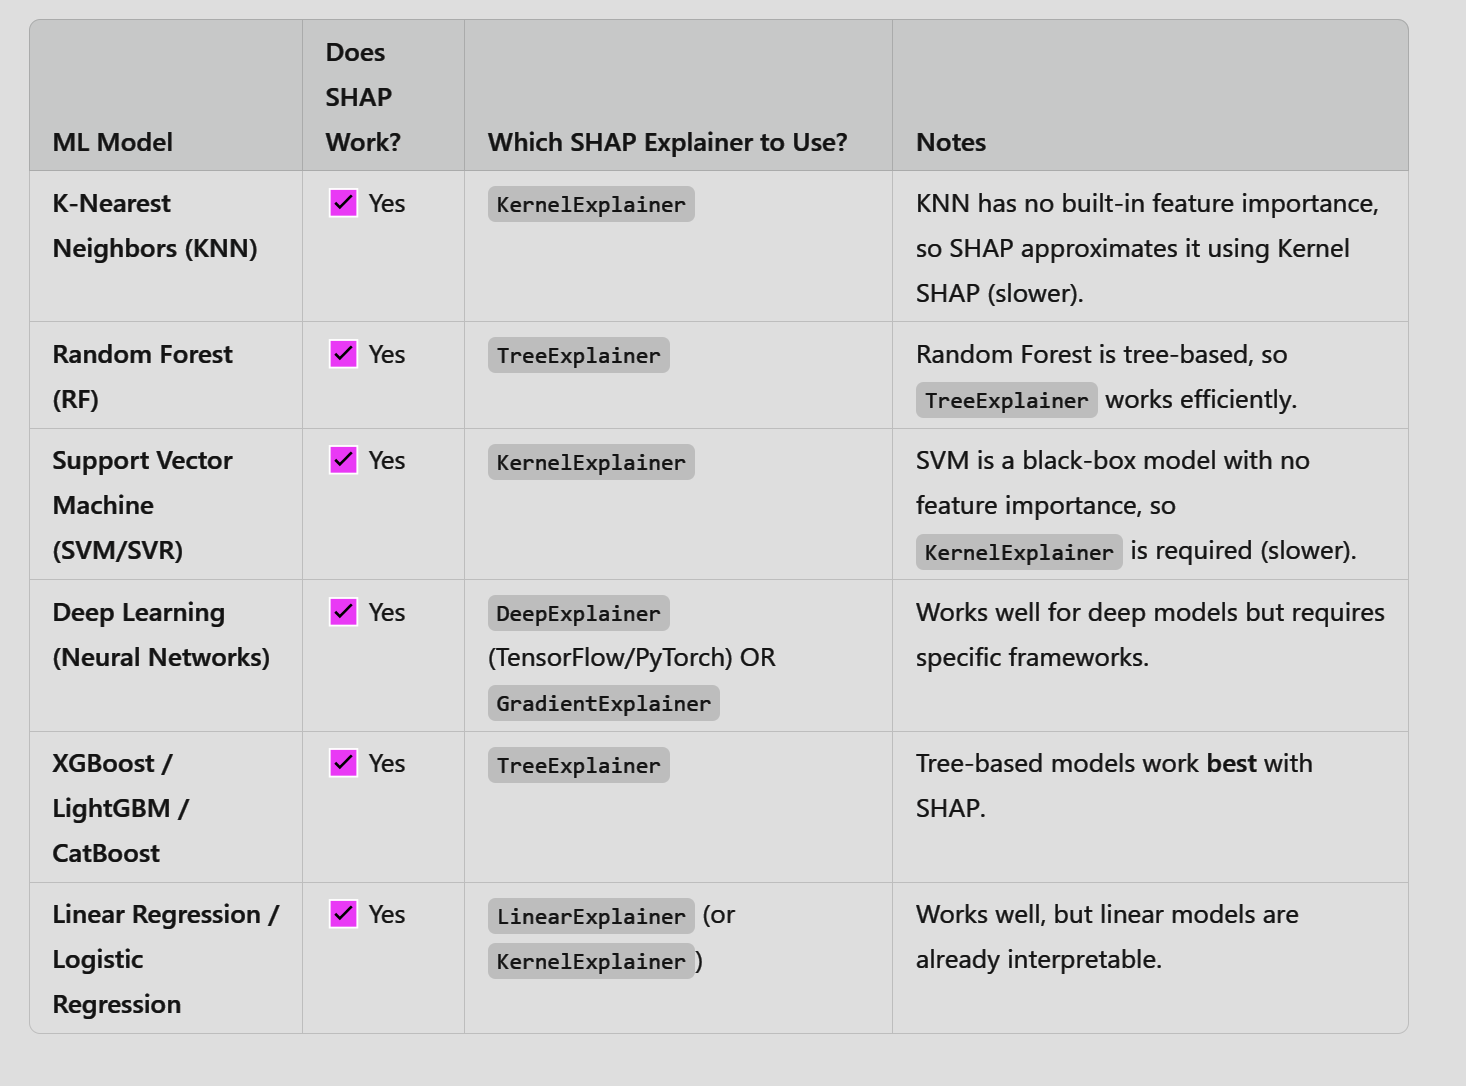

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


# Initialize and train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=20)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"R² Score: {r2_knn:.2f}")

Thats totally rubbish.. model.. SO no point checking SHAP, but just so you learn how to do it...

In [ ]:
import shap

# Use a small subset of training data as background for KernelExplainer
X_train_sample = X_train.sample(50, random_state=42)

# Initialize Kernel SHAP Explainer
explainer_knn = shap.KernelExplainer(knn_model.predict, X_train_sample)

# Compute SHAP values for a subset of test data
shap_values_knn = explainer_knn.shap_values(X_test.sample(100, random_state=42))

# Visualize SHAP summary plot
shap.summary_plot(shap_values_knn, X_test.sample(100, random_state=42))

RANDOM Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor


# Initialize and train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R² Score: {r2_rf:.2f}")

In [ ]:
# Use only a subset of X_test for faster SHAP computation
X_test_sample = X_test.sample(200, random_state=42)

# Initialize SHAP TreeExplainer for Random Forest
explainer_rf = shap.TreeExplainer(rf_model)

# Compute SHAP values on a smaller dataset
shap_values_rf = explainer_rf.shap_values(X_test_sample)

# Visualize summary plot
shap.summary_plot(shap_values_rf, X_test_sample)

SVR

In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

# SVR works better with scaled data, so we need to normalize it
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr_model = SVR(kernel='rbf', C=10, gamma=0.1)
svr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_svr = svr_model.predict(X_test_scaled)

# Evaluate performance
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"Support Vector Regression (SVR) Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_svr:.2f}")
print(f"R² Score: {r2_svr:.2f}")


What to Expect:
The SHAP summary plot will show which features have the biggest influence on the SVR model's predictions.
Since SVR is not a tree-based model, expect SHAP values to be estimated, making them a bit noisier.

In [ ]:
import shap

# Use a small sample of training data as background for KernelExplainer
X_train_sample = X_train_scaled[:50]  # Take only 50 samples to speed up SHAP

# Initialize Kernel SHAP Explainer
explainer_svr = shap.KernelExplainer(svr_model.predict, X_train_sample)

# Compute SHAP values for a subset of test data
X_test_sample = X_test_scaled[:100]  # Take 100 test samples for efficiency
shap_values_svr = explainer_svr.shap_values(X_test_sample)

# Visualize SHAP summary plot
shap.summary_plot(shap_values_svr, X_test_sample)


Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense
from sklearn.metrics import mean_absolute_error, r2_score

# Define the input layer
inputs = Input(shape=(X_train_scaled.shape[1],))

# Define the hidden layers
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)

# Define the output layer
outputs = Dense(1)(x)

# Create the model
deep_model = keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
deep_model.compile(optimizer='adam', loss='mse')

# Train the model
deep_model.fit(X_train_scaled, y_train, epochs=20, batch_size=32, verbose=1)

# Make predictions
y_pred_deep = deep_model.predict(X_test_scaled).flatten()

# Evaluate performance
mae_deep = mean_absolute_error(y_test, y_pred_deep)
r2_deep = r2_score(y_test, y_pred_deep)

print(f"Deep Learning Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_deep:.2f}")
print(f"R² Score: {r2_deep:.2f}")


Since this is a neural network model, we use DeepExplainer, which is optimized for deep learning models.

A SHAP summary plot showing which features influence house price predictions the most in the deep learning model.
Features will be ranked by importance, with color indicating how each feature affects predictions (positive or negative impact).

In [ ]:
import shap
import numpy as np

# Select a small sample from training data for SHAP reference
X_train_sample = X_train_scaled[:50]  # Background data for SHAP

# Initialize DeepExplainer with the trained model
explainer_deep = shap.DeepExplainer(deep_model, X_train_sample)

# Compute SHAP values for a subset of test data
X_test_sample = X_test_scaled[:100]  # Reduce to 100 test samples for efficiency
shap_values_deep = explainer_deep.shap_values(X_test_sample)

shap_values_deep=shap_values_deep.reshape(100,8)
# Visualize SHAP summary plot
shap.summary_plot(shap_values_deep, X_test_sample)


In [ ]:
shap.summary_plot(shap_values_deep, X_test_sample)

In [ ]:
import shap
import numpy as np

# Convert the samples explicitly to NumPy arrays
X_train_sample = np.array(X_train_scaled[:50])  # Convert to NumPy array
X_test_sample = np.array(X_test_scaled[:100])   # Convert to NumPy array

# Initialize GradientExplainer
explainer_grad = shap.GradientExplainer(deep_model, X_train_sample)

# Compute SHAP values
shap_values_grad = explainer_grad.shap_values(X_test_sample)

# Reshape SHAP values
shap_values_grad = np.array(shap_values_grad).reshape(100, X_test_scaled.shape[1])

# Visualize SHAP summary plot
shap.summary_plot(shap_values_grad, X_test_sample)

In [ ]:
X_test_sample.shape

Linear Model

In [ ]:
from sklearn.linear_model import LinearRegression
import shap
import numpy as np

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

# Evaluate model performance
from sklearn.metrics import mean_absolute_error, r2_score

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression Model Performance:")
print(f"Mean Absolute Error (MAE): {mae_lr:.2f}")
print(f"R² Score: {r2_lr:.2f}")

# Use SHAP's LinearExplainer for Linear Regression
explainer_lr = shap.LinearExplainer(lr_model, X_train)

# Compute SHAP values for test data
shap_values_lr = explainer_lr.shap_values(X_test)

# Visualize SHAP summary plot
shap.summary_plot(shap_values_lr, X_test)
